In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df=pd.read_csv('chocolate_sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184
...,...,...,...,...,...,...
3277,Karlen McCaffrey,Australia,Spicy Special Slims,17/05/2024,"$5,303.58",354
3278,Jehu Rudeforth,USA,White Choc,07/06/2024,"$7,339.32",121
3279,Ches Bonnell,Canada,Organic Choco Syrup,26/07/2024,$616.09,238
3280,Dotty Strutley,India,Eclairs,28/07/2024,"$2,504.62",397


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [98]:
#pre-processing
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [99]:
df.duplicated().sum()

np.int64(0)

In [100]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes Shipped'],
      dtype='object')

In [101]:
df.rename(columns={'Sales Person': 'Sales_Person', 'Boxes Shipped': 'Boxes_Shipped'}, inplace=True)

In [102]:
df.columns

Index(['Sales_Person', 'Country', 'Product', 'Date', 'Amount',
       'Boxes_Shipped'],
      dtype='object')

In [103]:
df.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


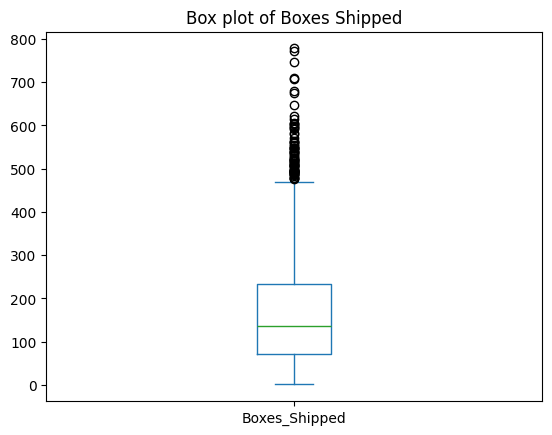

In [104]:
df['Boxes_Shipped'].plot(kind='box', title='Box plot of Boxes Shipped')
plt.show()

The median for boxes_shipped is arounf 130 boxes. Outliers range abive 500 boxes shipped. In this case, they only make ip 1.7% of the dataset and do not sgknificantly impact the results, therefore they have been filtrered out.

In [105]:
#check how many shipments abive 500
df[df['Boxes_Shipped']>500].count()

Sales_Person     56
Country          56
Product          56
Date             56
Amount           56
Boxes_Shipped    56
dtype: int64

In [106]:
#remove $ sign from Amount column and convert to float
df['Amount']=df['Amount'].str.replace('$','')
df['Amount']=df['Amount'].str.replace(',','').astype(float)


In [107]:
df.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,13685.0,184


In [108]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales_Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes_Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


In [109]:
df.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


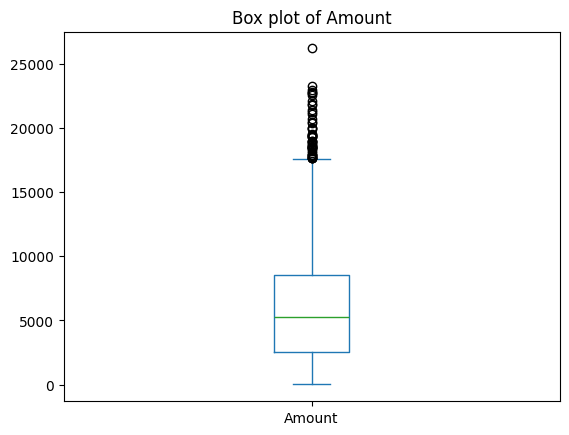

In [110]:
df['Amount'].plot(kind='box', title='Box plot of Amount')
plt.show()

In [111]:
#Goals
1. Understand the distribution of sales per country
2. Number of boxes shipped per country
3. Correlation between boxes shipped and amount
4. Who is the best sales person in terms of amount sold?
5. What is the best and least selling product?
6. Sales trend over past months
7. What is the most popular product for the top 3 countries?

SyntaxError: invalid syntax (2108602732.py, line 2)

In [ ]:
#1. Understand the distribution of sales per country
countries=df['Country'].unique()
countries

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [ ]:
sales_per_country=df.groupby('Country')['Amount'].sum()
sales_per_country

Country
Australia      3646444.35
Canada         3078495.65
India          3343730.83
New Zealand    3043654.04
UK             3365388.90
USA            3313858.09
Name: Amount, dtype: float64

In [ ]:
sales_per_country=sales_per_country.sort_values(ascending=False)
sales_per_country

Country
Australia      3646444.35
UK             3365388.90
India          3343730.83
USA            3313858.09
Canada         3078495.65
New Zealand    3043654.04
Name: Amount, dtype: float64

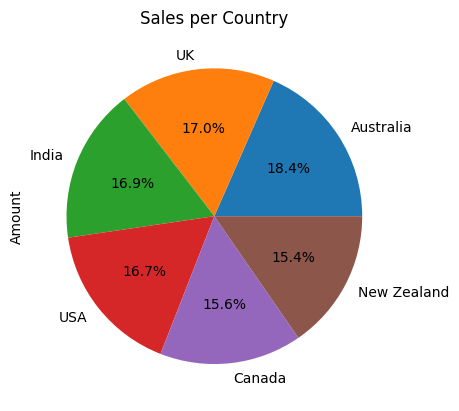

In [ ]:
sales_per_country.plot(kind='pie', title='Sales per Country',autopct='%1.1f%%')
plt.show()

Results inidcate that sales from all 6 countries are about equal. Ther ei sno siginifica nt difference between sales from each country.

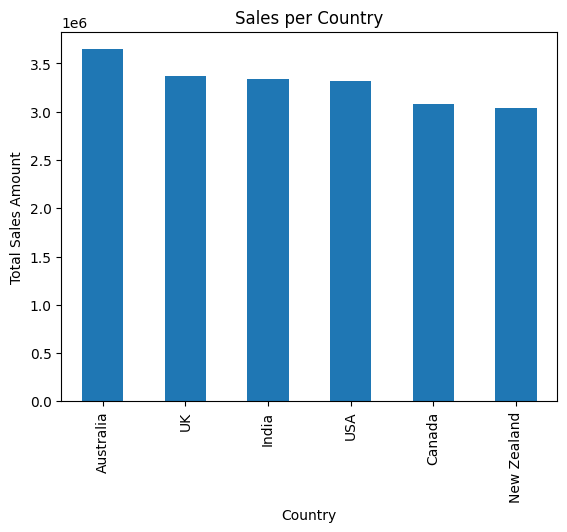

In [ ]:
sales_per_country.plot(kind='bar', title='Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.show()

The bar plot demonstrates that Autralia is the top_selling countrt fillowing by uk and indua. New zealand sells around 500000 USD less lifetime value.

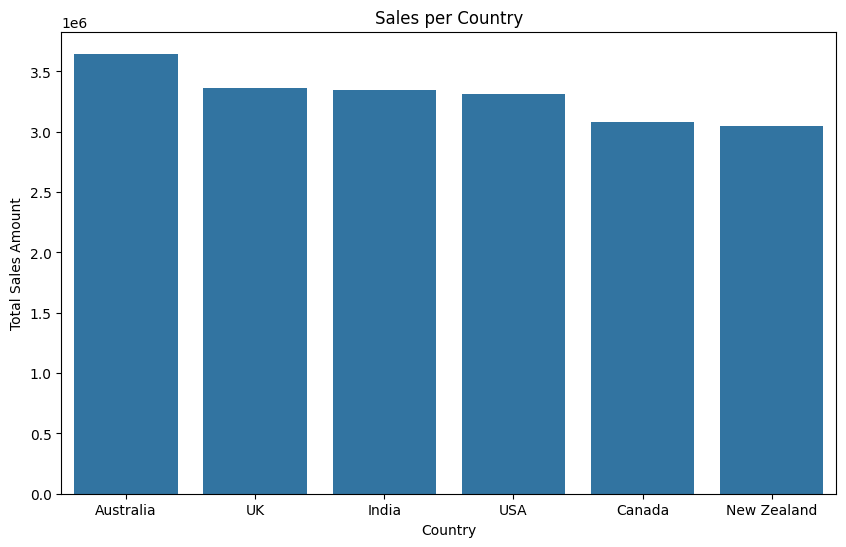

In [ ]:
#using seaborn for better visualization
plt.figure(figsize=(10,6))
sns.barplot(x=sales_per_country.index, y=sales_per_country.values)
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.show()


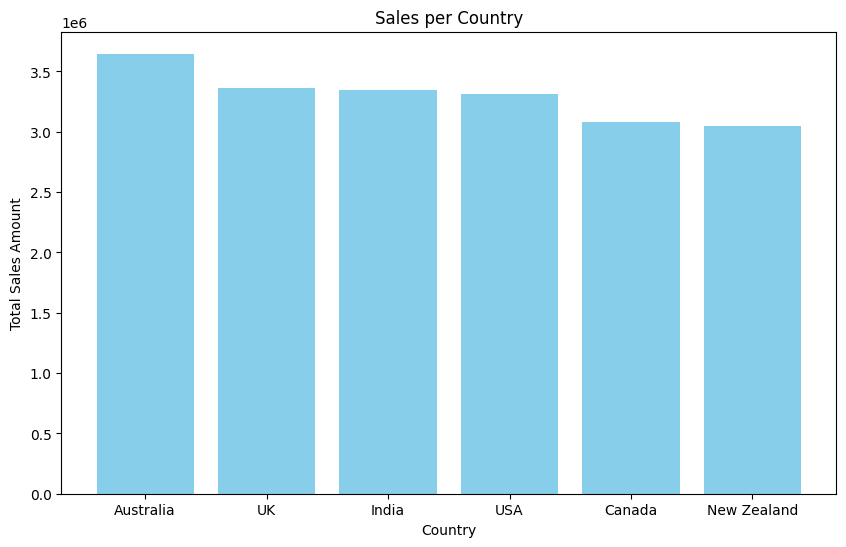

In [ ]:
#use matplotlib to for barplot
plt.figure(figsize=(10,6))
plt.bar(sales_per_country.index, sales_per_country.values, color='skyblue')
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.show()

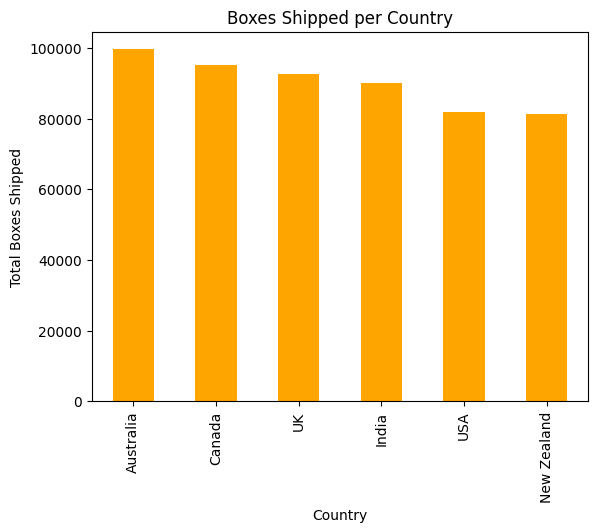

In [ ]:
#2. Number of boxes shipped per country
boxes_per_country=df.groupby('Country')['Boxes_Shipped'].sum().sort_values(ascending=False)
boxes_per_country.plot(kind='bar', title='Boxes Shipped per Country', color='orange')
plt.xlabel('Country')
plt.ylabel('Total Boxes Shipped')
plt.show()

In [ ]:
#sales, boxes shipped, can creare custom metrics like average sales per box shipped 
#visualise per country

average_sales_per_box= df.groupby('Country').agg({'Amount':'sum', 'Boxes_Shipped':'sum'})
average_sales_per_box


,Amount,Boxes_Shipped
Country,,
Australia,3646444.35,99618
Canada,3078495.65,95158
India,3343730.83,89968
New Zealand,3043654.04,81350
UK,3365388.90,92523
USA,3313858.09,81820


In [112]:
average_sales_per_box.columns

Index(['Amount', 'Boxes_Shipped'], dtype='object')

In [116]:
#create average sales per box column
average_sales_per_box['Avg']= average_sales_per_box['Amount']/average_sales_per_box['Boxes_Shipped']
average_sales_per_box['Avg']

Country
Australia      36.604272
Canada         32.351412
India          37.165779
New Zealand    37.414309
UK             36.373538
USA            40.501810
Name: Avg, dtype: float64

In [117]:
average_sales_per_box

,Amount,Boxes_Shipped,Avg
Country,,,
Australia,3646444.35,99618,36.604272
Canada,3078495.65,95158,32.351412
India,3343730.83,89968,37.165779
New Zealand,3043654.04,81350,37.414309
UK,3365388.90,92523,36.373538
USA,3313858.09,81820,40.501810


<Axes: title={'center': 'Average Sales per Box Shipped by Country'}, xlabel='Country'>

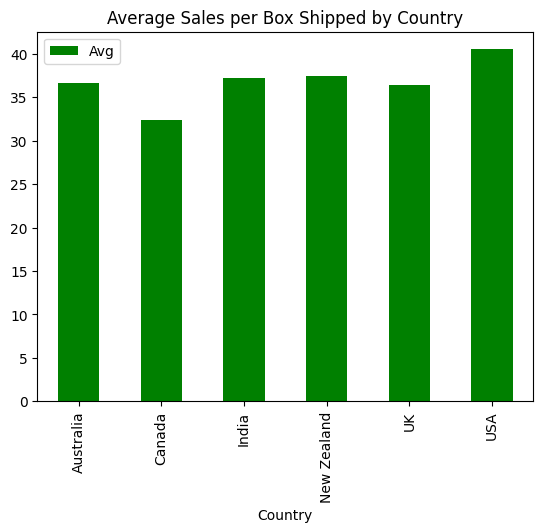

In [118]:
average_sales_per_box.plot(kind='bar', y='Avg', title='Average Sales per Box Shipped by Country', color='green')

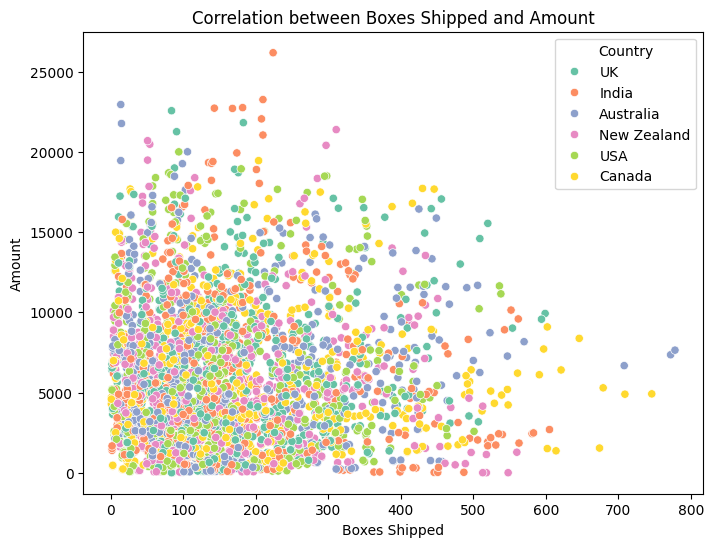

In [119]:
#3. Correlation between boxes shipped and amount
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Boxes_Shipped', y='Amount', hue='Country', palette='Set2')
plt.title('Correlation between Boxes Shipped and Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount')
plt.show()

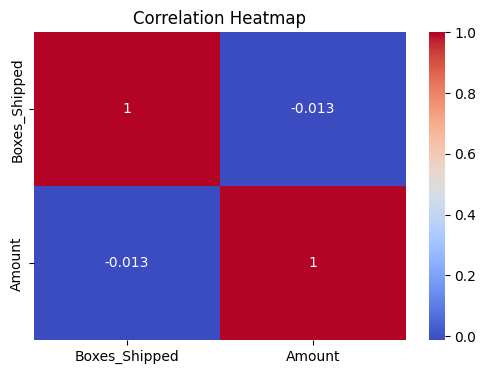

In [120]:
#heatmap corr
plt.figure(figsize=(6,4))
corr=df[['Boxes_Shipped','Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

There exists no siginificant correlation between boxes (-1.3%) shipped and amount. 

In [121]:
df.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


/var/folders/5g/7m5tb_kn729bgtcb25k58dlc0000gn/T/ipykernel_34408/241392979.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(best_sales_person.index, rotation=45)


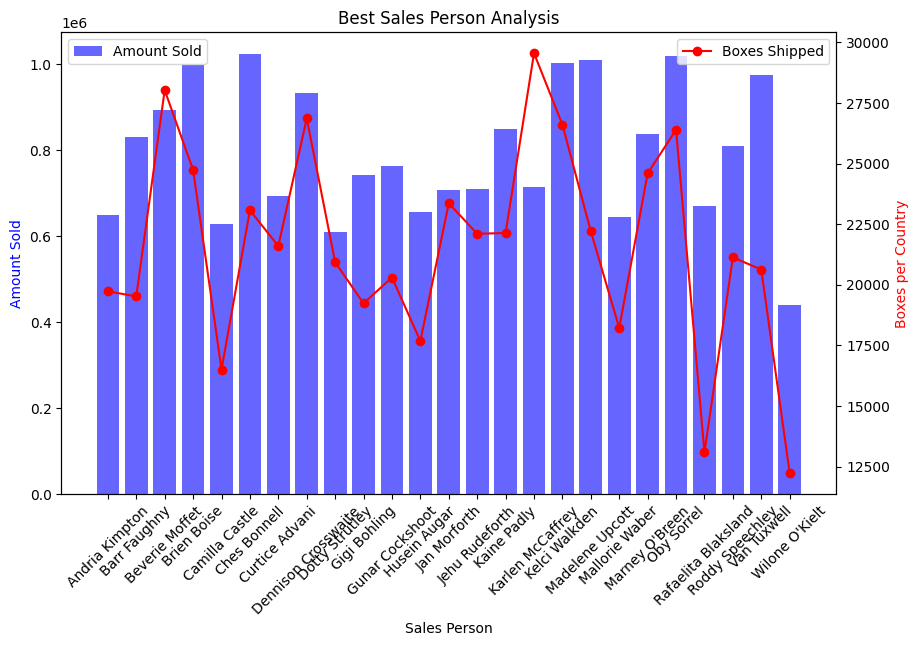

In [129]:
#Who is the best sales person in terms of amount sold?
best_sales_person=df.groupby('Sales_Person').agg({'Amount':'sum', 'Boxes_Shipped':'sum'})

#dual axis plot for amount and boxes per country
fig, ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax1.bar(best_sales_person.index, best_sales_person['Amount'], color='b', alpha=0.6, label='Amount Sold')
ax2.plot(best_sales_person.index, best_sales_person['Boxes_Shipped'], color='r', marker='o', label='Boxes Shipped')
ax1.set_xlabel('Sales Person')
ax1.set_ylabel('Amount Sold', color='b')
ax2.set_ylabel('Boxes per Country', color='r')
plt.title('Best Sales Person Analysis')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

#rotate x labels
ax1.set_xticklabels(best_sales_person.index, rotation=45)

plt.show()


In [132]:
#double bar plot for amount and boxes shipped per sales person

best_sales_person2=df.groupby('Sales_Person').agg({'Amount':'sum', 'Boxes_Shipped':'sum'})
best_sales_person2

,Amount,Boxes_Shipped
Sales_Person,,
Andria Kimpton,648214.81,19730
Barr Faughny,830826.91,19520
Beverie Moffet,892421.37,28027
Brien Boise,997326.48,24738
Camilla Castle,628613.13,16505
Ches Bonnell,1022599.96,23070
Curtice Advani,691797.92,21599
Dennison Crosswaite,931849.57,26862
Dotty Strutley,608101.17,20927


In [137]:
#normalize the data for better visualization
best_sales_person2['Amount']=best_sales_person2['Amount']/best_sales_person2['Amount'].max()
best_sales_person2['Boxes_Shipped']=best_sales_person2['Boxes_Shipped']/best_sales_person2['Boxes_Shipped'].max()

best_sales_person2.sort_values(by='Amount', ascending=False,inplace=True)

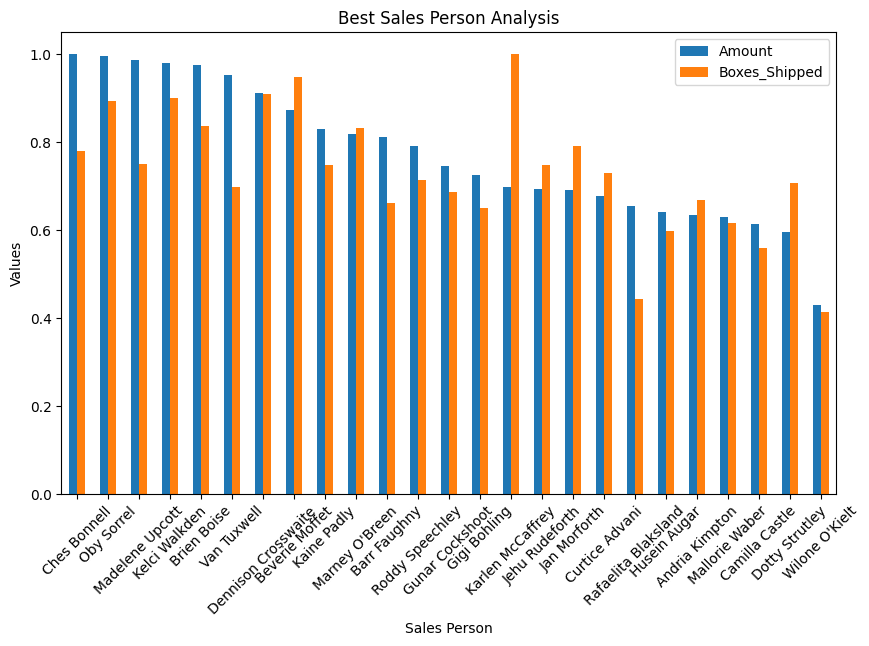

In [138]:

best_sales_person2.plot(kind='bar', figsize=(10,6))
plt.title('Best Sales Person Analysis')
plt.xlabel('Sales Person')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

The top sellers are Ches Boneel, Oby Sorrel and Adelene Upcott in terms of amoutn sold. Ggi Bohling sells much more products but makes less profits. Van Tuxwell sales are vert well balanced.

In [141]:
#What is the best and least selling product?
product_sales=df.groupby('Product').agg({'Amount':'sum','Boxes_Shipped':'sum'}).sort_values(by='Amount', ascending=False)
product_sales

,Amount,Boxes_Shipped
Product,,
Smooth Sliky Salty,1120201.09,26969
50% Dark Bites,1087659.35,29810
White Choc,1054257.00,25158
Peanut Butter Cubes,1036591.09,25339
Eclairs,996947.96,26678
99% Dark & Pure,960033.45,24818
85% Dark Bars,955268.24,23828
Organic Choco Syrup,945345.73,23602
Spicy Special Slims,938131.69,26662


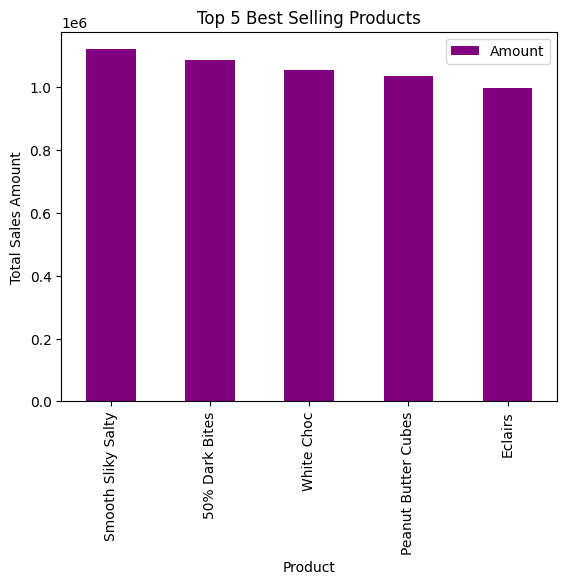

In [142]:
top_5_products=product_sales.head(5)
top_5_products.plot(kind='bar', y='Amount', title='Top 5 Best Selling Products', color='purple')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.show()

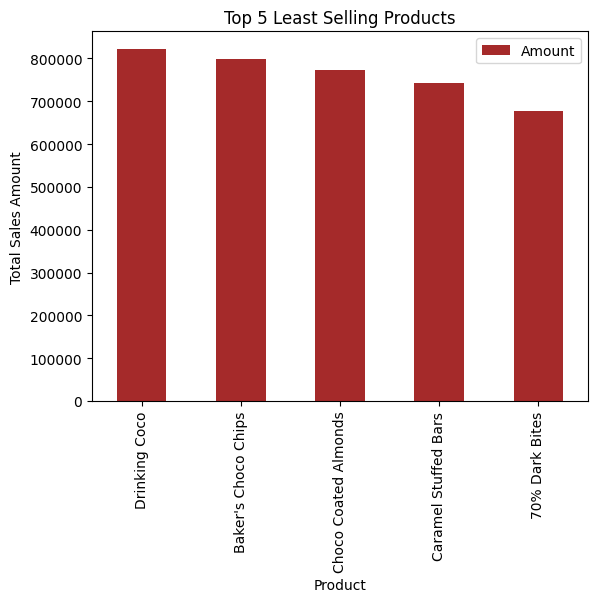

In [143]:
least_5_products=product_sales.tail(5)
least_5_products.plot(kind='bar', y='Amount', title='Top 5 Least Selling Products', color='brown')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.show()

In [ ]:
#6. Sales trend over past months

In [144]:
df.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales_Person   3282 non-null   object        
 1   Country        3282 non-null   object        
 2   Product        3282 non-null   object        
 3   Date           3282 non-null   datetime64[ns]
 4   Amount         3282 non-null   float64       
 5   Boxes_Shipped  3282 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 154.0+ KB


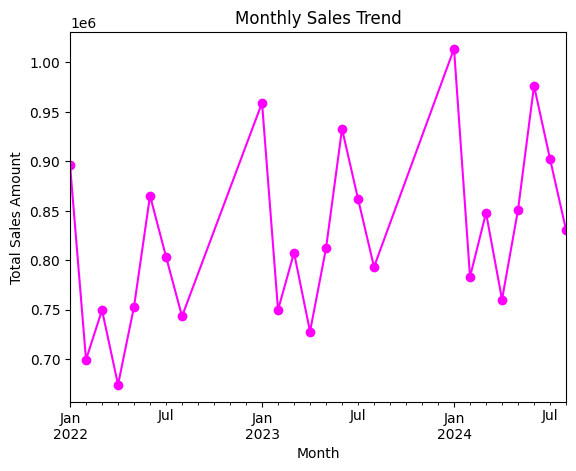

In [146]:
#plot sales trend over months
df['Month']=df['Date'].dt.to_period('M')
monthly_sales=df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend', color='magenta')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()


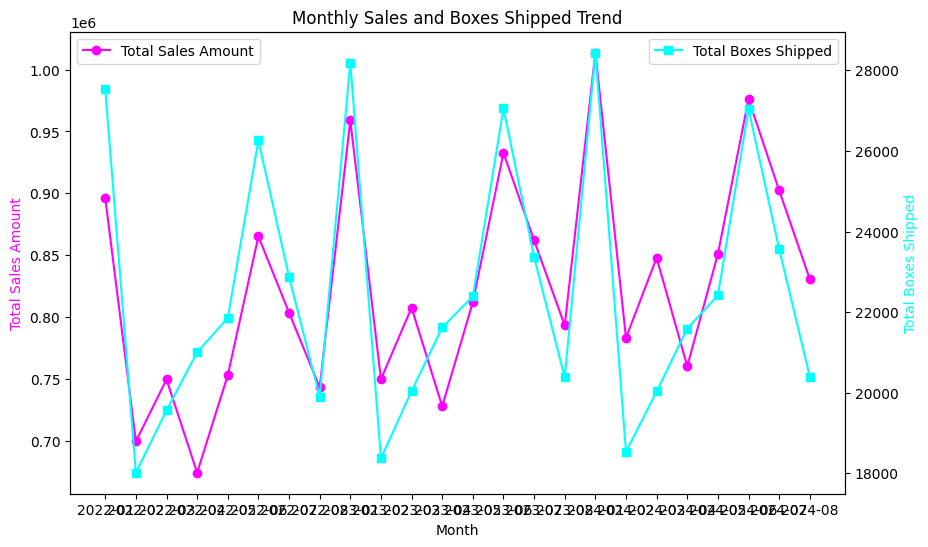

In [147]:
#add secondary y axis for boxes shipped over months
monthly_boxes=df.groupby('Month')['Boxes_Shipped'].sum()
fig, ax1=plt.subplots(figsize=(10,6))
ax2=ax1.twinx()
ax1.plot(monthly_sales.index.astype(str), monthly_sales.values, color='magenta', marker='o', label='Total Sales Amount')
ax2.plot(monthly_boxes.index.astype(str), monthly_boxes.values, color='cyan', marker='s', label='Total Boxes Shipped')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales Amount', color='magenta')
ax2.set_ylabel('Total Boxes Shipped', color='cyan')
plt.title('Monthly Sales and Boxes Shipped Trend')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Much more sales have been made in Januaries.

In [149]:
monthly_boxes

Month
2022-01    27535
2022-02    18015
2022-03    19561
2022-04    21003
2022-05    21856
2022-06    26260
2022-07    22876
2022-08    19901
2023-01    28189
2023-02    18369
2023-03    20041
2023-04    21619
2023-05    22391
2023-06    27056
2023-07    23367
2023-08    20379
2024-01    28438
2024-02    18533
2024-03    20031
2024-04    21594
2024-05    22415
2024-06    27041
2024-07    23565
2024-08    20402
Freq: M, Name: Boxes_Shipped, dtype: int64

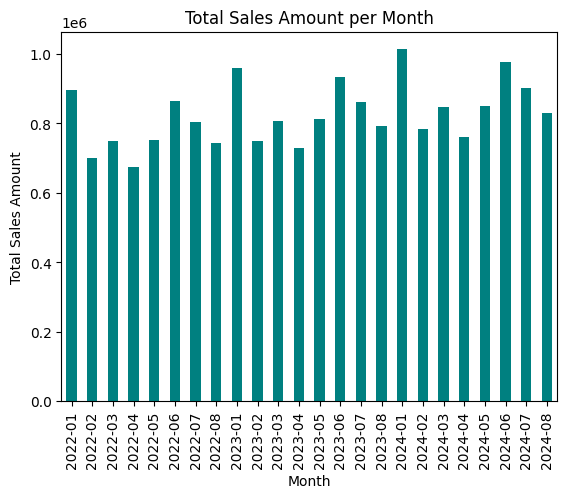

In [148]:
#bar plot for each month total
monthly_sales.plot(kind='bar', title='Total Sales Amount per Month', color='teal')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

In [150]:
# What is the most popular product for the top 3 countries?
df.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02


In [ ]:
popular_products_by_country=df.groupby(['Country','Product']).agg({'Boxes_Shipped':'sum'})
popular_products_by_country.head(100)

Boxes_Shipped
Country   Product                            
Australia 50% Dark Bites                 9692
          70% Dark Bites                 6389
          85% Dark Bars                  3649
          99% Dark & Pure                4116
          After Nines                    2731
...                                       ...
UK        Caramel Stuffed Bars           6706
          Choco Coated Almonds           3589
          Drinking Coco                  4629
          Eclairs                        3901
          Fruit & Nut Bars               3443

[100 rows x 1 columns]

In [155]:
popular_products_by_country.to_csv('popular_products_by_country.csv')

For the top 3 countries (Australia, Canada and India), the follopwing cholates were topsellers in descending order: 50% Dark Bites, 70% Dark Bites, 85% Dark Bar.

In [156]:
# What is the most popular product for Australia in January?
australia_sales_january=df.query('Country=="Australia" and Date.dt.month==1')
australia_sales_january.head()

,Sales_Person,Country,Product,Date,Amount,Boxes_Shipped,Month
15,Beverie Moffet,Australia,Organic Choco Syrup,2022-01-26,6790.0,356,2022-01
112,Madelene Upcott,Australia,Fruit & Nut Bars,2022-01-05,5579.0,92,2022-01
131,Kaine Padly,Australia,Manuka Honey Choco,2022-01-12,2765.0,264,2022-01
147,Brien Boise,Australia,Baker's Choco Chips,2022-01-04,12516.0,212,2022-01
148,Dennison Crosswaite,Australia,99% Dark & Pure,2022-01-31,2758.0,18,2022-01


In [158]:
australia_sales_january_grouped = australia_sales_january.groupby('Product').sum('Boxes_Shipped')
australia_sales_january_grouped

,Amount,Boxes_Shipped
Product,,
50% Dark Bites,38032.42,3554
70% Dark Bites,33433.47,689
99% Dark & Pure,73788.97,1528
Almond Choco,12351.31,1313
Baker's Choco Chips,113503.41,2715
Caramel Stuffed Bars,28267.84,485
Drinking Coco,15742.71,773
Eclairs,22647.14,9
Fruit & Nut Bars,41988.46,434


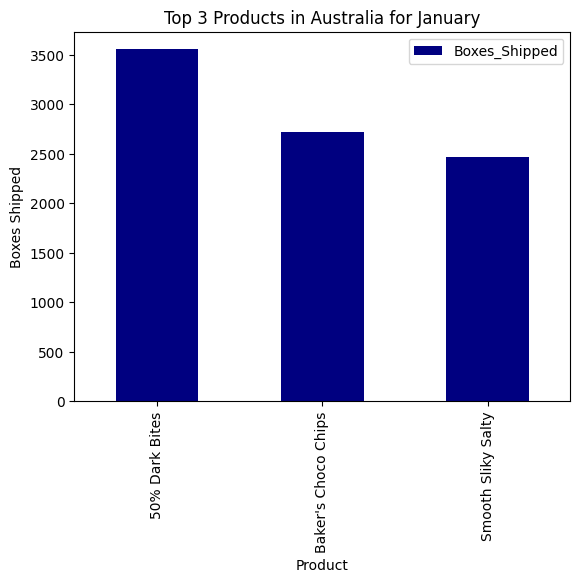

In [160]:
top_3_products=australia_sales_january_grouped.sort_values(by='Boxes_Shipped', ascending=False).head(3)
top_3_products.plot(kind='bar', y='Boxes_Shipped', title='Top 3 Products in Australia for January', color='navy')
plt.xlabel('Product')
plt.ylabel('Boxes Shipped')
plt.show()

#In Australia for january sales, the following choclates should be restocked in advance and sell very well: 50% Dark Bites, Bakers Choco chips and Smooth silky salty.